In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
test = pd.read_csv(r'test.csv', encoding='utf_8_sig')
test.fillna('', inplace=True)
print(len(test))
test_code_change = list(test['diff'].astype(str))
from commitfit import CommitFitModel

3034


/usr/local/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
model = CommitFitModel.from_pretrained('M-all-2-best-code change')
# Assuming you have the predicted labels in an array called `predicted_labels`
# and the true labels in an array called `true_labels`.

In [4]:
# Calculate the confusion matrix
predicted_labels = model.predict(test['text'].to_list(),test_code_change)

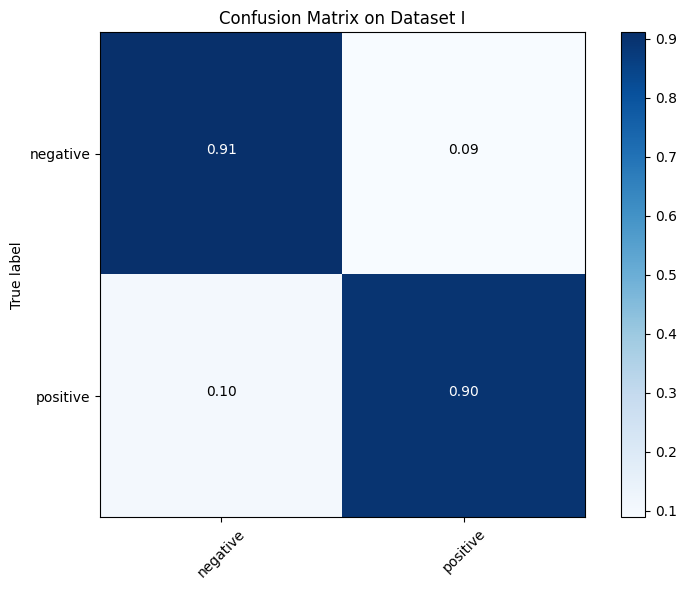

In [7]:
cm = confusion_matrix(test['label'], predicted_labels)

# Call the function to plot the confusion matrix
class_names = test['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages
plt.savefig('Confusion Matrix on Dataset I')

In [6]:
# plt.show()

<Figure size 640x480 with 0 Axes>